#data['trial_index']: trial index
#data['trial_time']: time at which trial starts with th e central fixation dot
#data['response_arrow_start_angle']: the angle of the response arrow at the start of the response phase.
#data['motion_direction']: the stimulus motion direction
#data['motion_coherence']: the stimulus motion coherence
#data['estimate_x']: x cartesian coordinate of the stimulus motion direction
#data['estimate_y']: y cartesian coordinate of the stimulus motion direction
#data['reaction_time']: subject's reaction time
#data['raw_response_time']: subject response time since the start of the run (of about 200 trials)
#data['prior_std']: It is the standard deviation of the statistical distribution (motion direction generative process over trials, which we call "experimental prior") from which we sampled the stimulus motion direction displayed in each trial.
#data['prior_mean']: the most frequently displayed motion direction. It is the mean of the statistical distribution (motion direction generative process over trials, which we call "experimental prior") from which we sampled the stimulus motion direction displayed in each trial.
#data['subject_id']: the id of the subject for which behavior was recorded.
#data['experiment_name']: the name of the experiment. This dataaset only contains the "data01_direction4priors" experiment in which subject underwent a task in which four motion direction were sampled from one of four priors with 10, 40, 60 and 80 degree standard deviations in each block of about 200 trials. The mean of the "experimental prior" was fixed at 225 deg.
#data['experiment_id']: the id of the experiment.
#data['session_id']: the id of the session.
#data['run_id']: the id of the run.

data['trial_index']: trial index

data['trial_time']: time at which trial starts with th e central fixation dot

data['response_arrow_start_angle']: the angle of the response arrow at the start of the response phase.

data['motion_direction']: the stimulus motion direction

data['motion_coherence']: the stimulus motion coherence

data['estimate_x']: x cartesian coordinate of the stimulus motion direction

data['estimate_y']: y cartesian coordinate of the stimulus motion direction

data['reaction_time']: subject's reaction time

data['raw_response_time']: subject response time since the start of the run (of about 200 trials)

data['prior_std']: It is the standard deviation of the statistical distribution (motion direction generative process over trials, which we call "experimental prior") from which we sampled the stimulus motion direction displayed in each trial.

data['prior_mean']: the most frequently displayed motion direction. It is the mean of the statistical distribution (motion direction generative process over trials, which we call "experimental prior") from which we sampled the stimulus motion direction displayed in each trial.

data['subject_id']: the id of the subject for which behavior was recorded.

data['experiment_name']: the name of the experiment. This dataaset only contains the "data01_direction4priors" experiment in which subject underwent a task in which four motion direction were sampled from one of four priors with 10, 40, 60 and 80 degree standard deviations in each block of about 200 trials. The mean of the "experimental prior" was fixed at 225 deg.

data['experiment_id']: the id of the experiment.

data['session_id']: the id of the session.

data['run_id']: the id of the run.

In [ ]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, requests
from matplotlib import colors
from matplotlib import rcParams
from matplotlib.colors import ListedColormap
from numpy import pi
from copy import copy

In [ ]:
#Data retrieval
url = "https://github.com/steevelaquitaine/projInference/raw/gh-pages/data/csv/data01_direction4priors.csv"
try:
  RequestAPI = requests.get(url)
except requests.ConnectionError:
  print("Failed to download data. Please contact steeve.laquitaine@epfl.ch")
else:
  if RequestAPI.status_code != requests.codes.ok:
    print("Failed to download data. Please contact steeve.laquitaine@epfl.ch")
  else:
    with open("data01_direction4priors.csv", "wb") as fid:
      fid.write(RequestAPI.content)


In [ ]:
#Data loading
df = pd.read_csv("data01_direction4priors.csv")
#This is for easy change, to be re-writed later
df2 = df[df["subject_id"] == 1]
df2 = df2[df2["session_id"] == 1]
df2 = df2[df2["run_id"] == 1]
df2

,trial_index,trial_time,response_arrow_start_angle,motion_direction,motion_coherence,estimate_x,estimate_y,reaction_time,raw_response_time,prior_std,prior_mean,subject_id,experiment_name,experiment_id,session_id,run_id
0,1,0.000000,NaN,225,0.12,-1.749685,-1.785666,NaN,NaN,10,225,1,data01_direction4priors,11,1,1
1,2,2.730730,NaN,225,0.12,-1.819693,-1.714269,NaN,NaN,10,225,1,data01_direction4priors,11,1,1
2,3,4.913950,NaN,235,0.06,-1.562674,-1.951422,NaN,NaN,10,225,1,data01_direction4priors,11,1,1
3,4,6.997296,NaN,225,0.06,-1.601388,-1.919781,NaN,NaN,10,225,1,data01_direction4priors,11,1,1
4,5,9.097130,NaN,215,0.24,-1.639461,-1.887371,NaN,NaN,10,225,1,data01_direction4priors,11,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,209,406.047040,NaN,215,0.06,-1.713624,-1.820300,NaN,NaN,10,225,1,data01_direction4priors,11,1,1
209,210,407.930308,NaN,225,0.06,-1.853612,-1.677535,NaN,NaN,10,225,1,data01_direction4priors,11,1,1
210,211,409.763635,NaN,235,0.06,-1.601388,-1.919781,NaN,NaN,10,225,1,data01_direction4priors,11,1,1
211,212,411.613408,NaN,225,0.12,-1.523336,-1.982283,NaN,NaN,10,225,1,data01_direction4priors,11,1,1


In [ ]:
# Calculate circular error at each trial
subject_estimate_rad = np.arctan2(df2["estimate_y"], df2["estimate_x"])
subject_estimate_rad

In [ ]:
# Calculate circular distance at each trial
error_deg = df2["motion_direction"]-np.degrees(subject_estimate_rad)
error_deg = (error_deg + 180) % 360 - 180

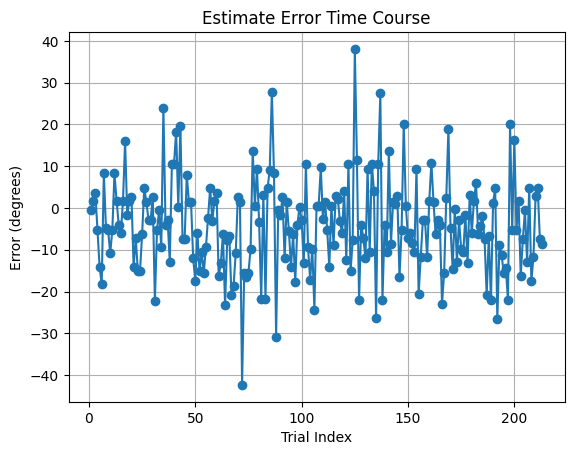

In [ ]:
# Plot the error time course
trial_index = range(1, len(df2) + 1)
plt.plot(trial_index, error_deg, marker='o')
plt.xlabel('Trial Index')
plt.ylabel('Error (degrees)')
plt.title('Estimate Error Time Course')
plt.grid(True)
plt.show()

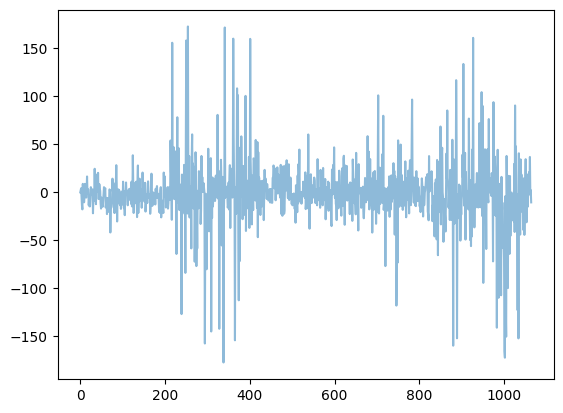

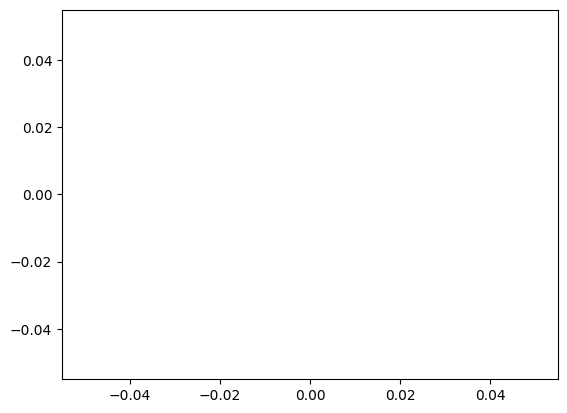

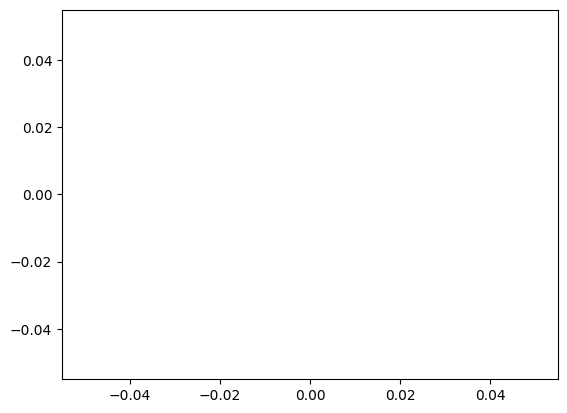

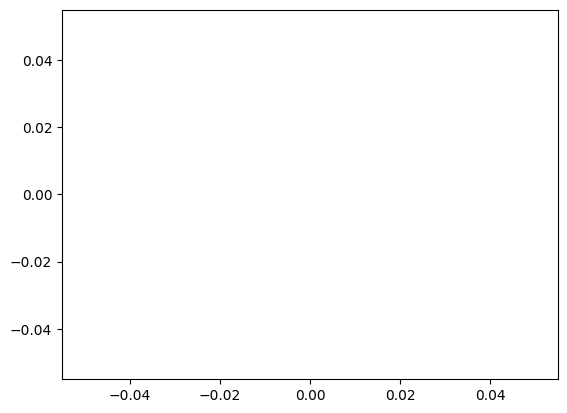

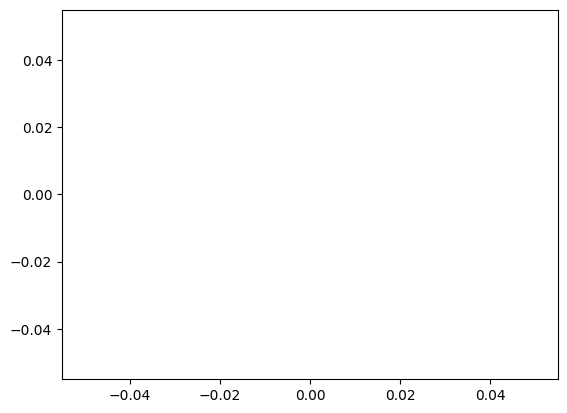

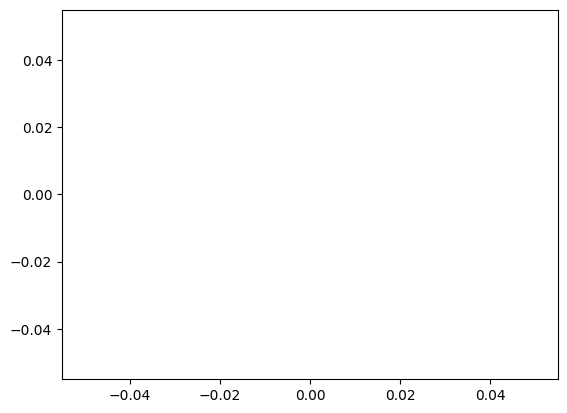

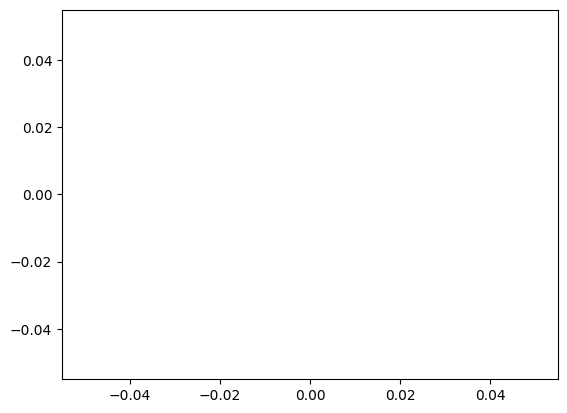

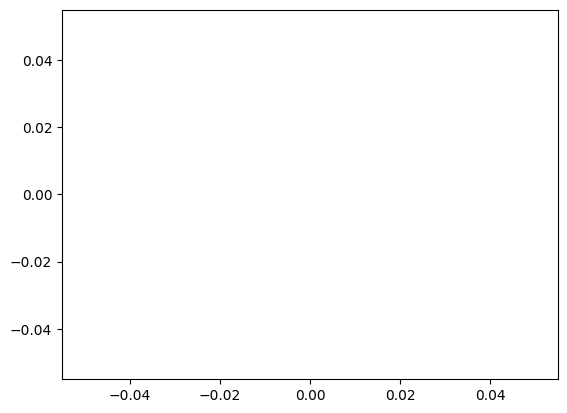

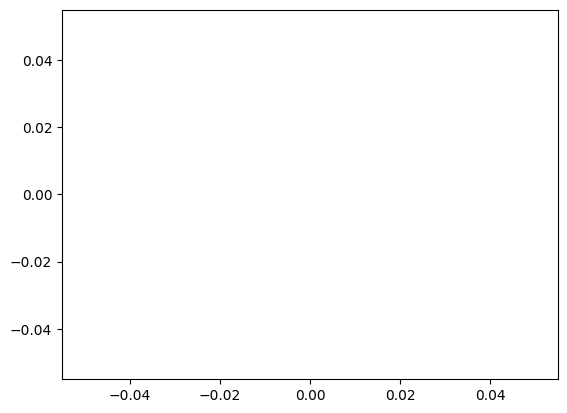

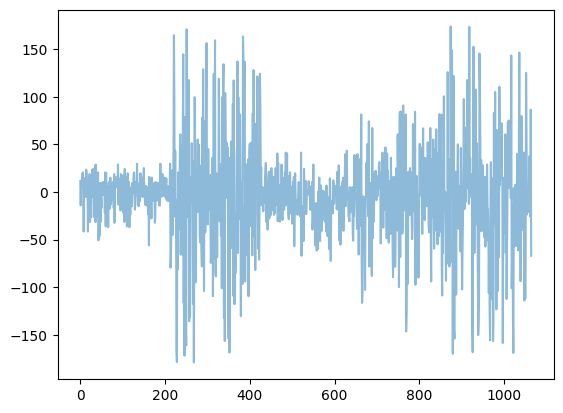

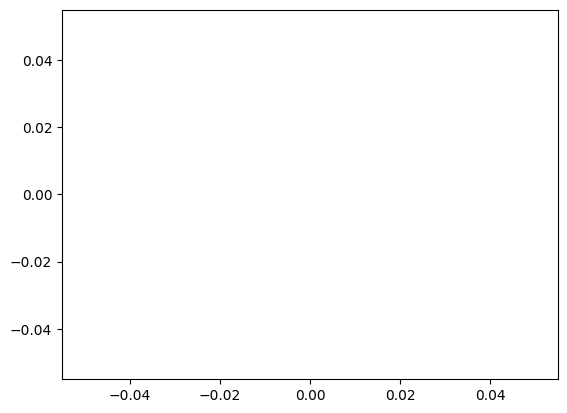

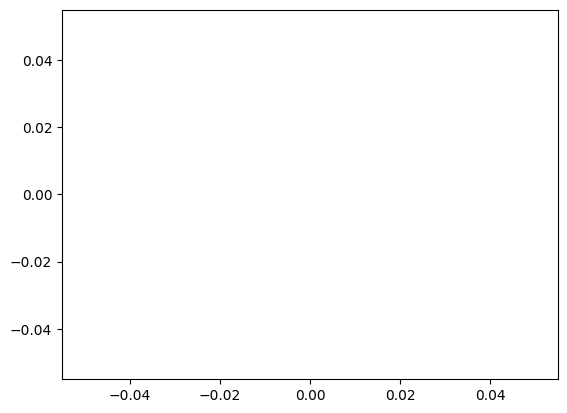

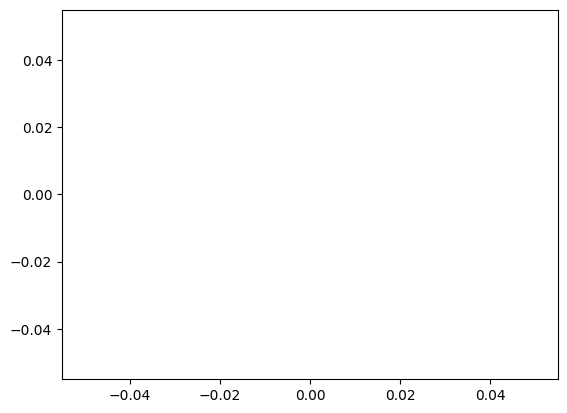

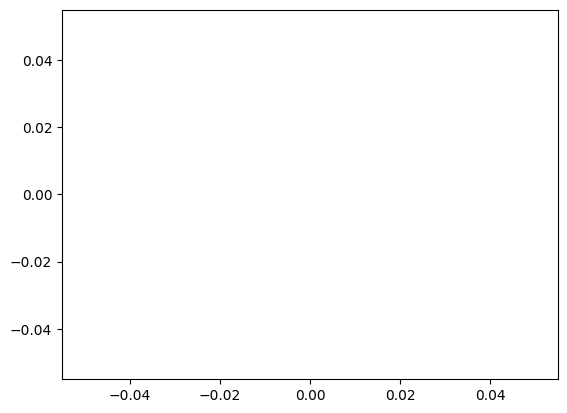

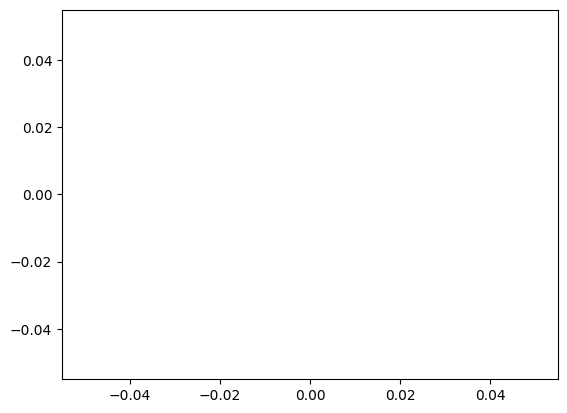

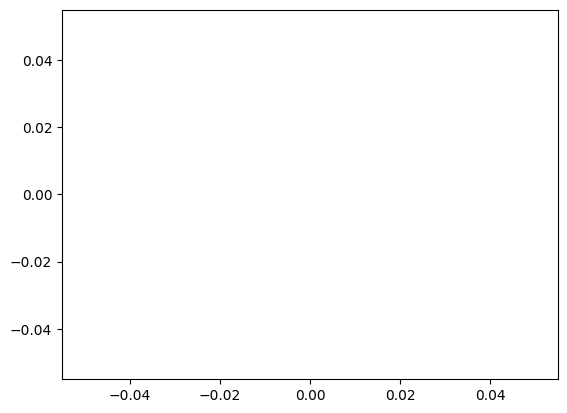

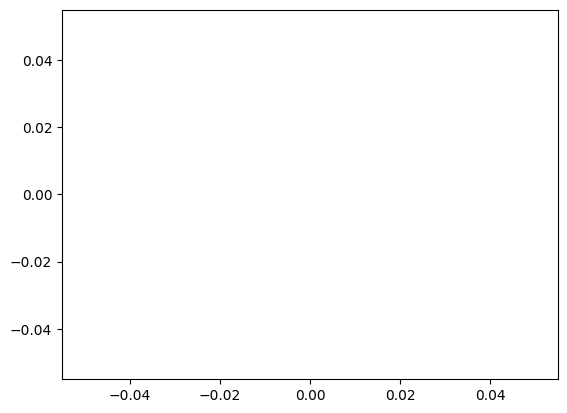

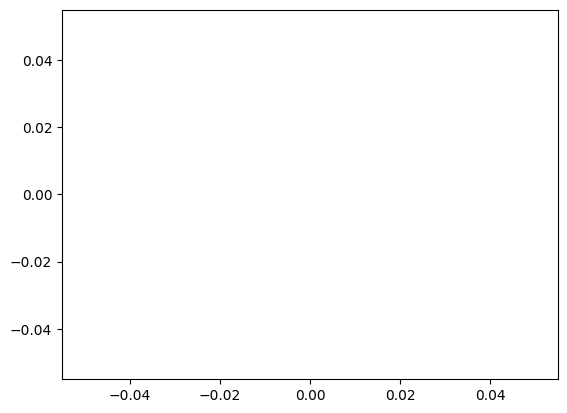

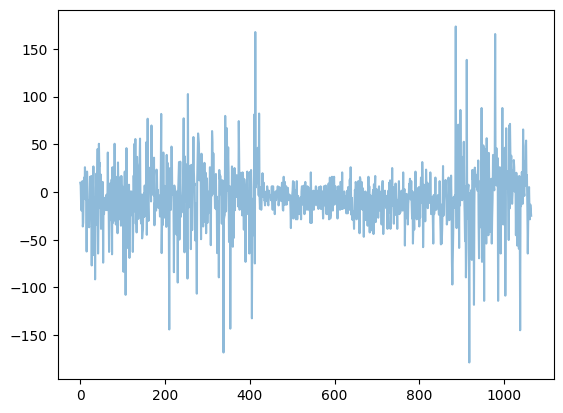

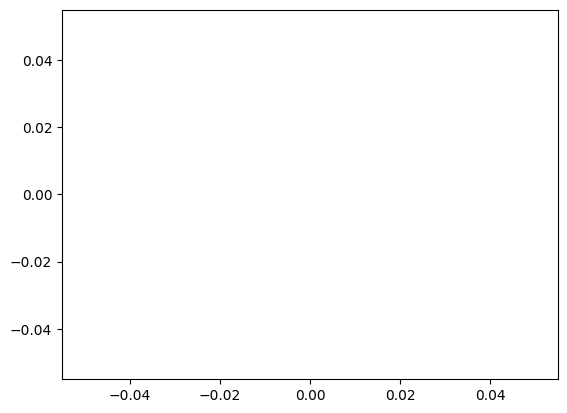

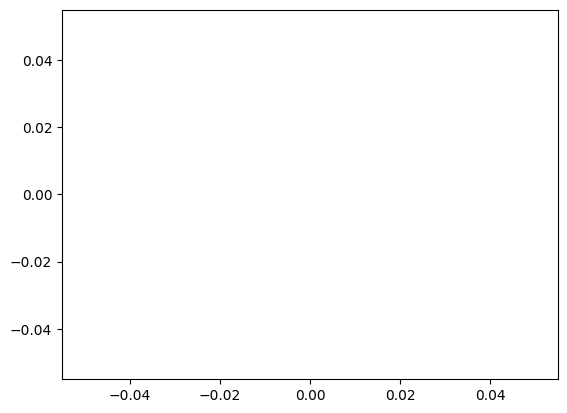

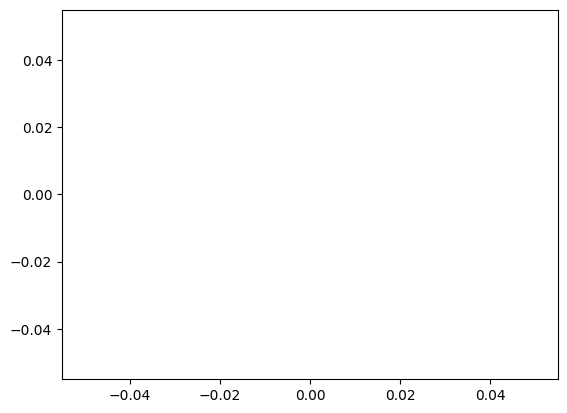

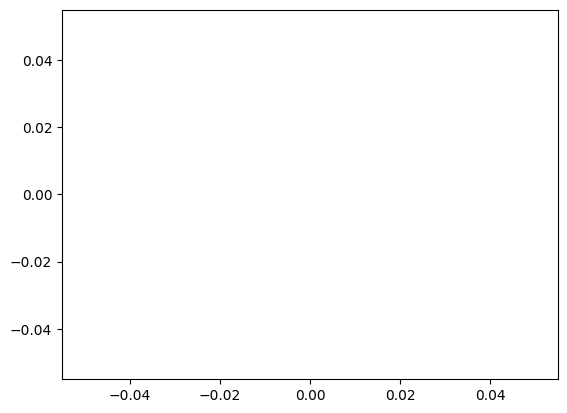

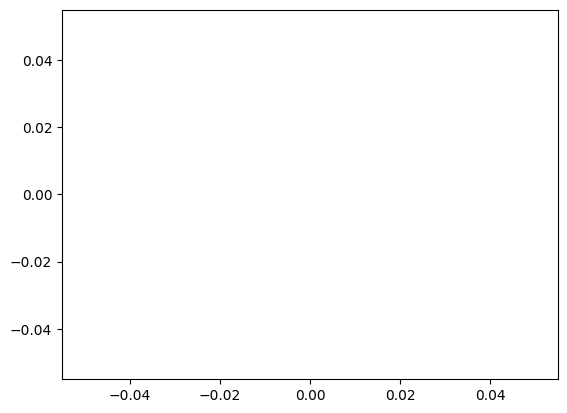

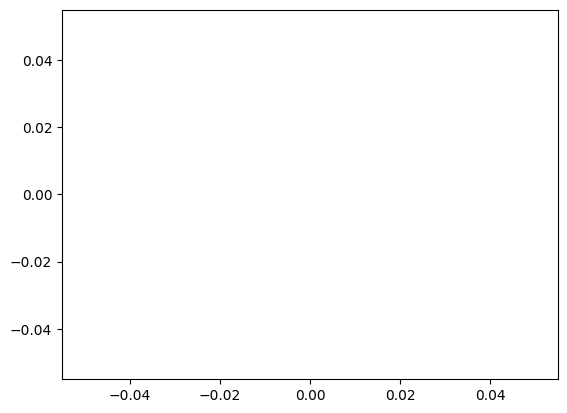

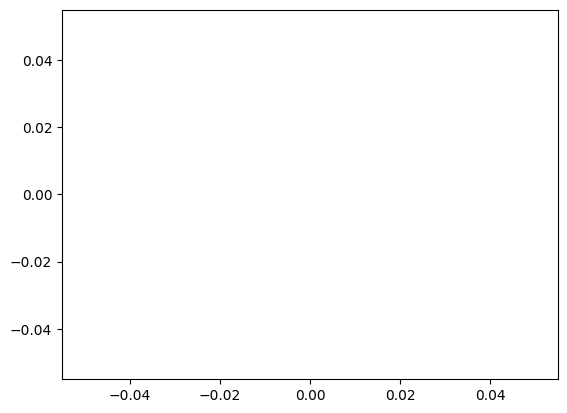

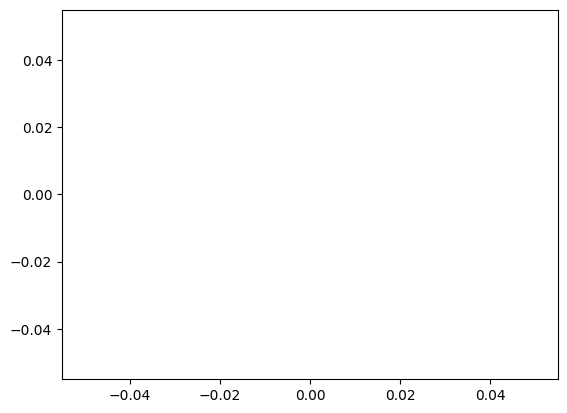

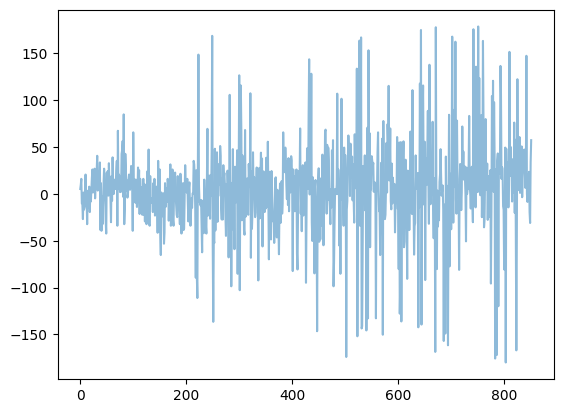

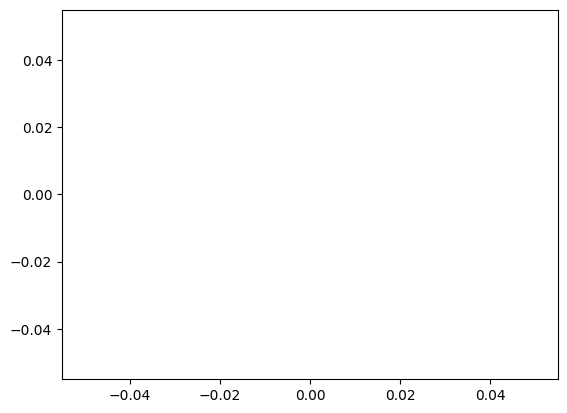

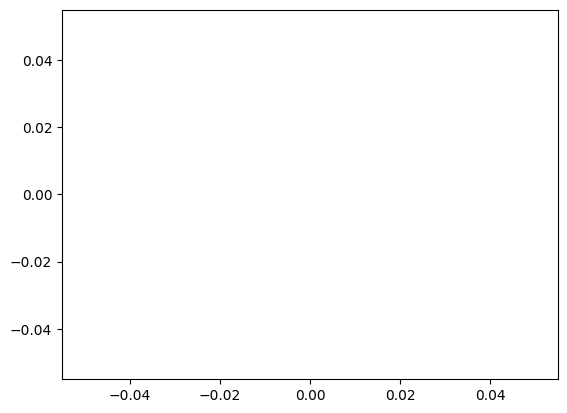

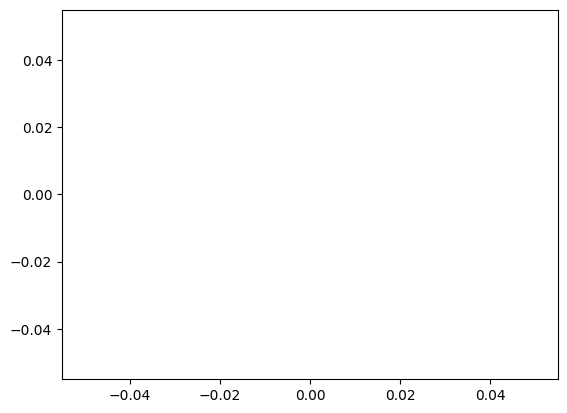

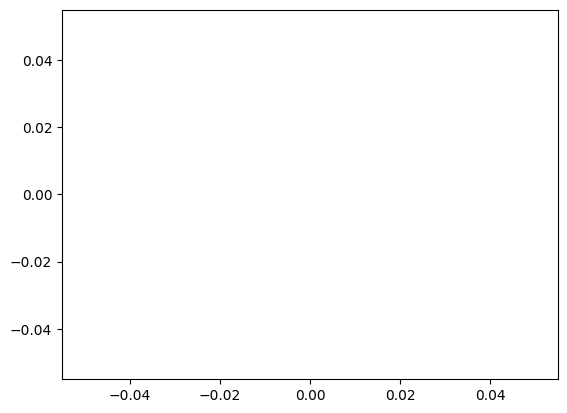

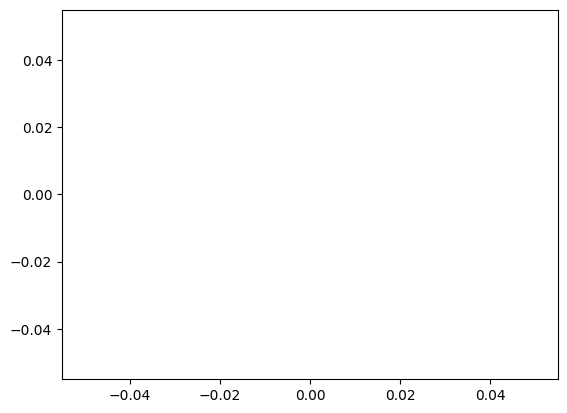

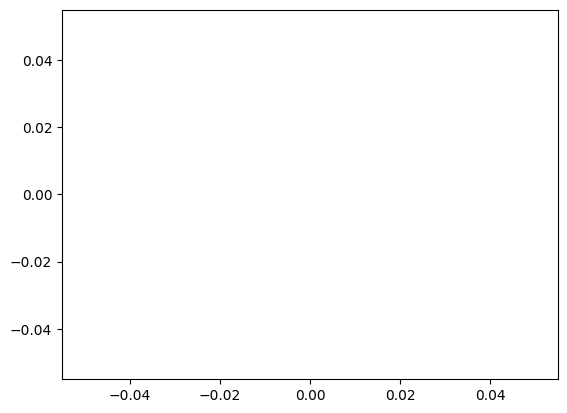

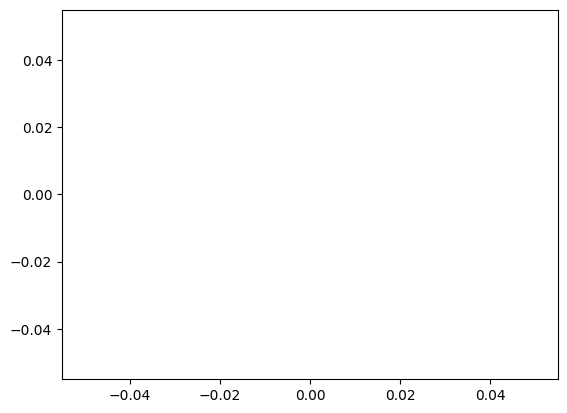

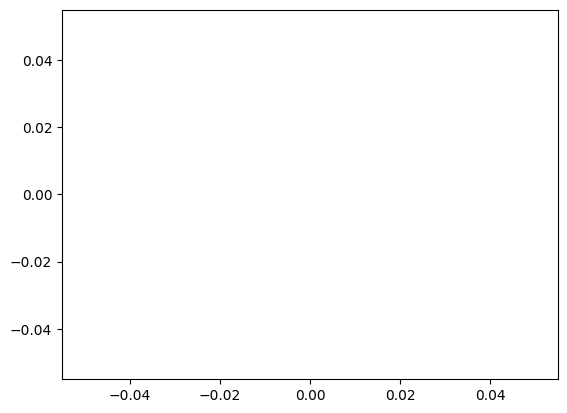

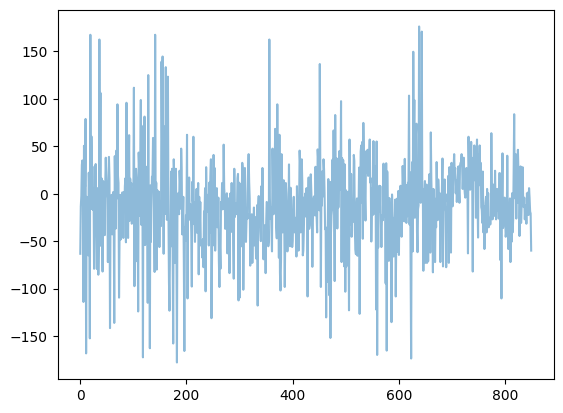

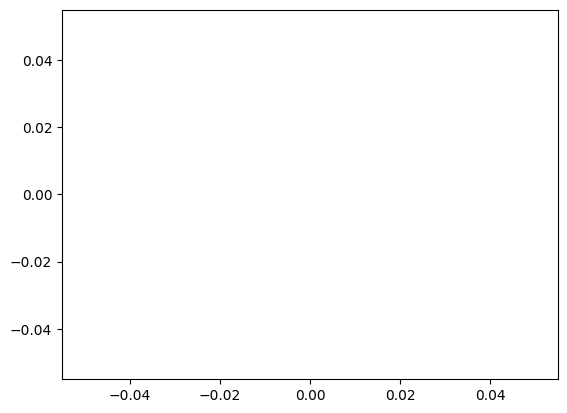

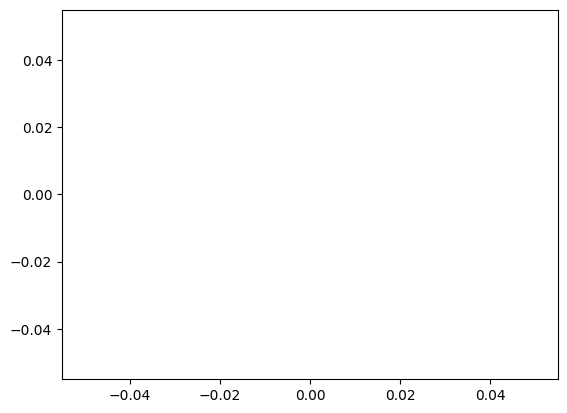

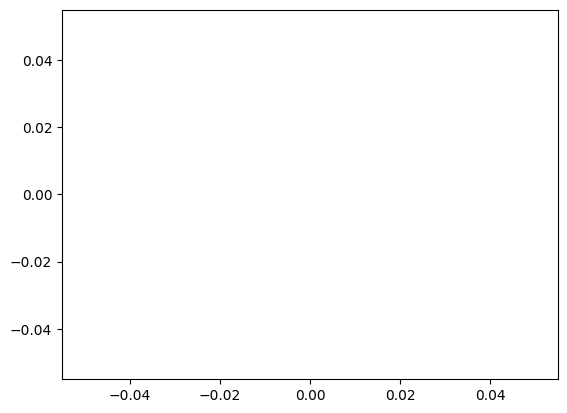

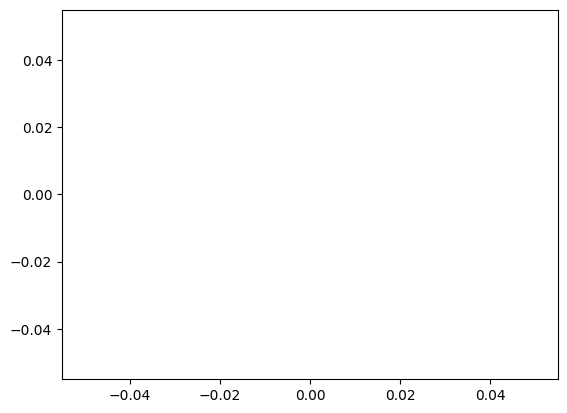

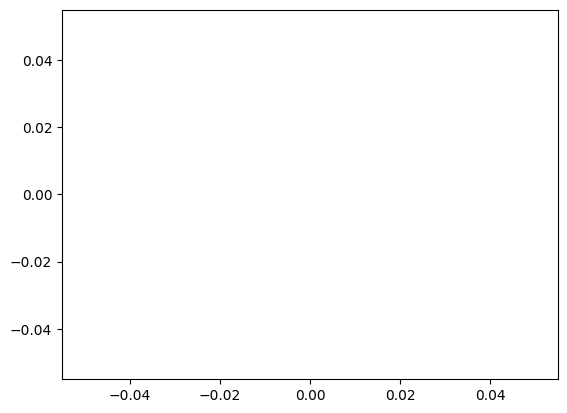

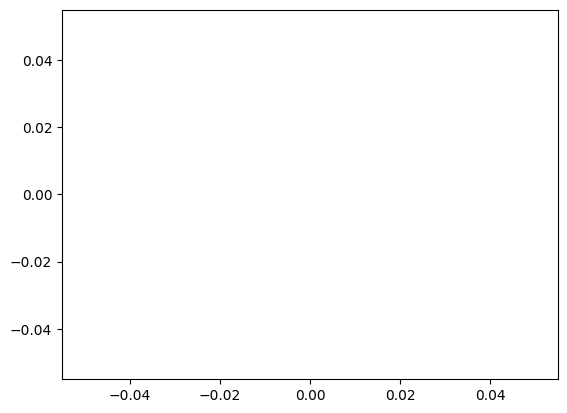

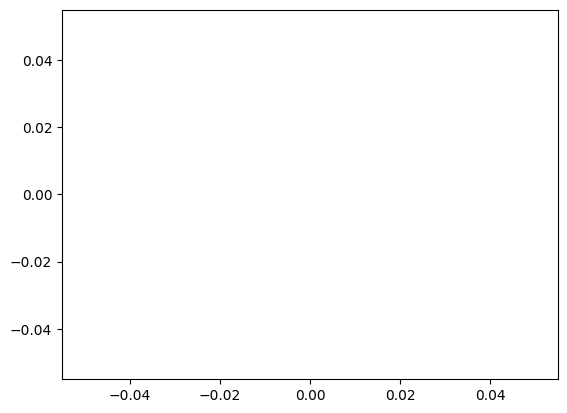

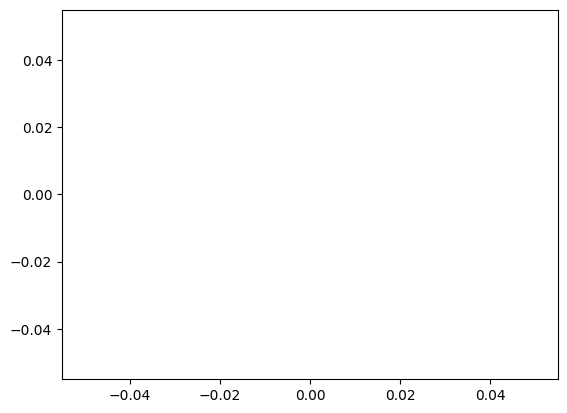

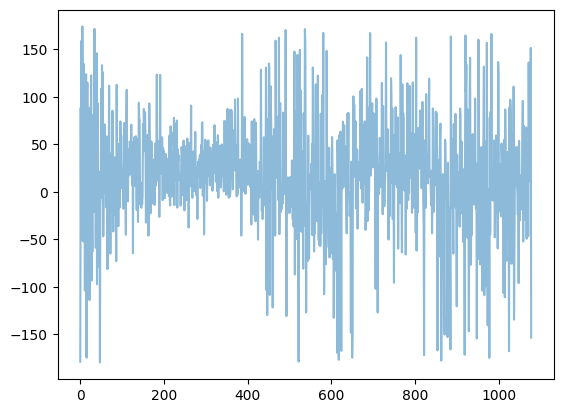

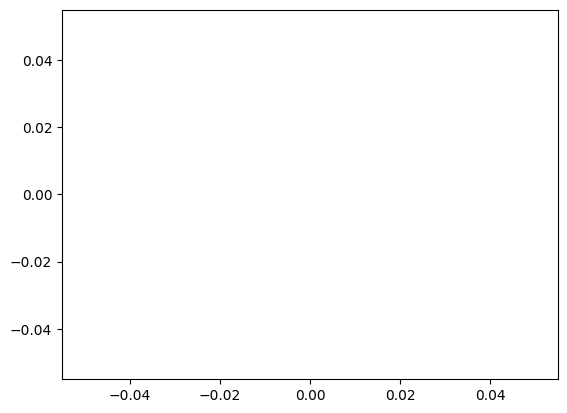

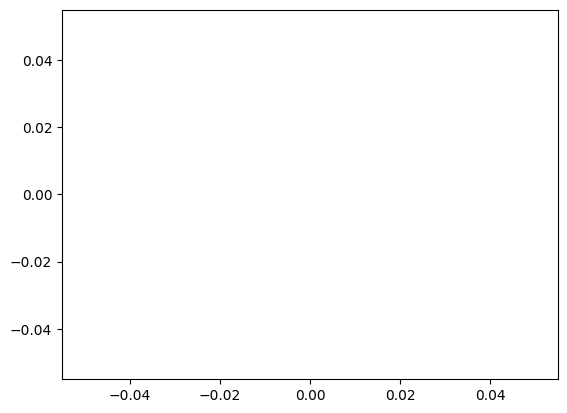

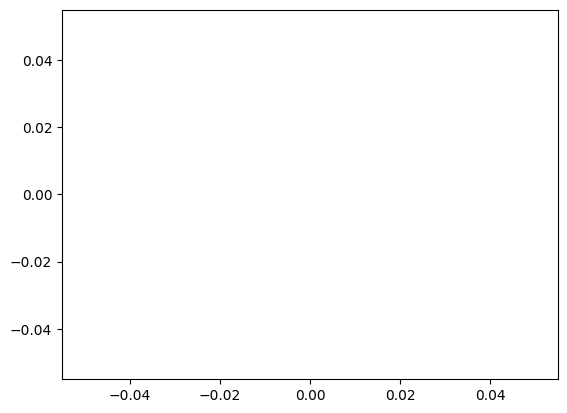

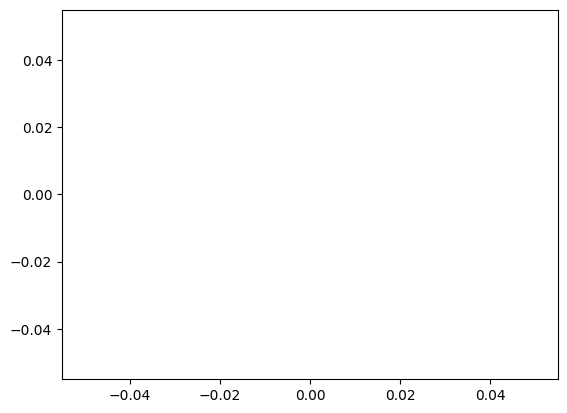

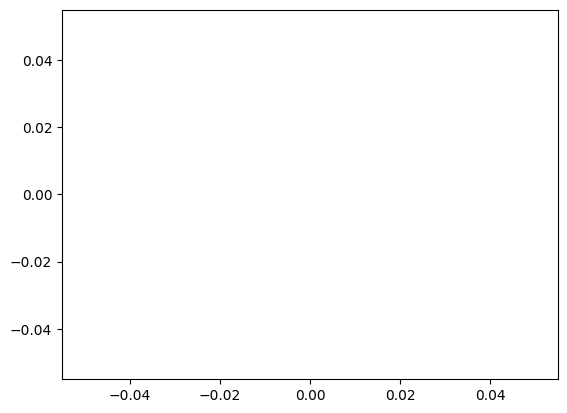

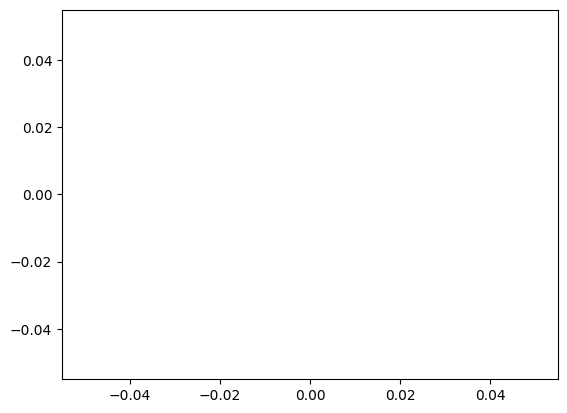

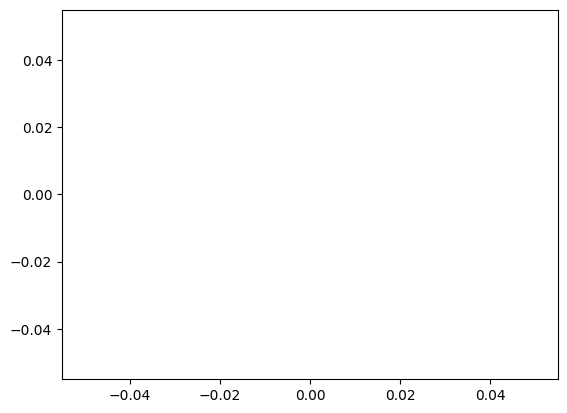

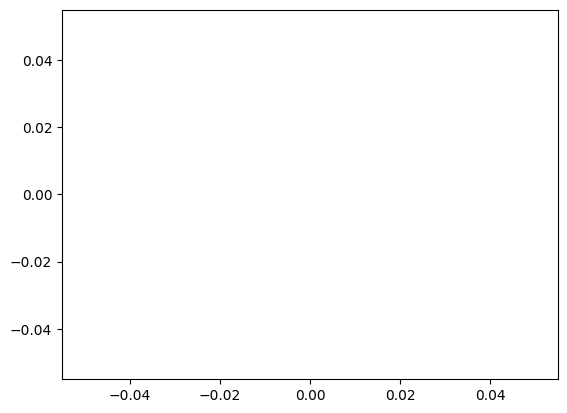

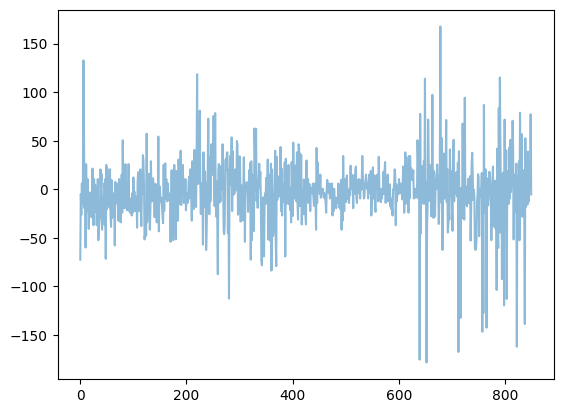

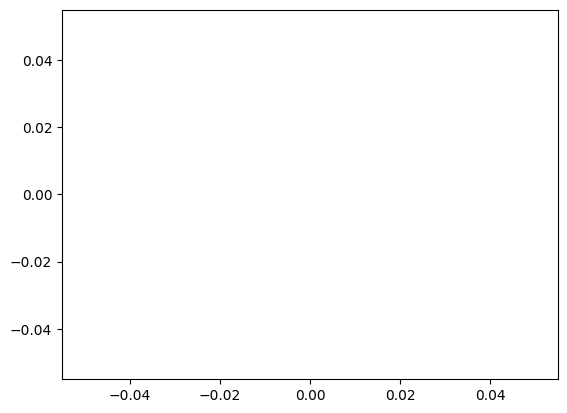

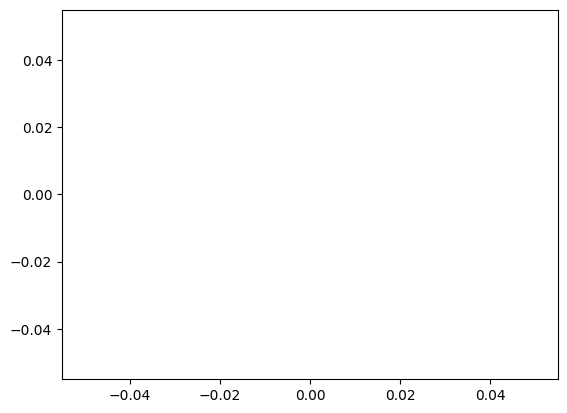

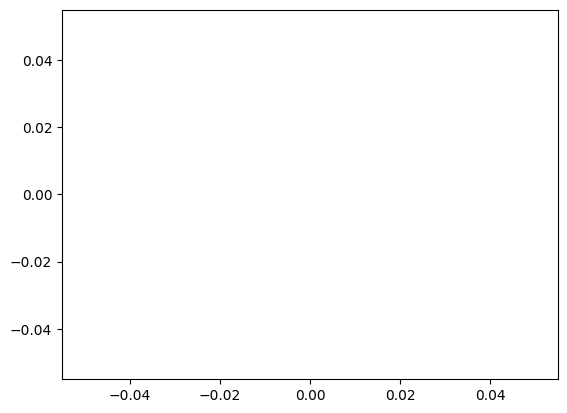

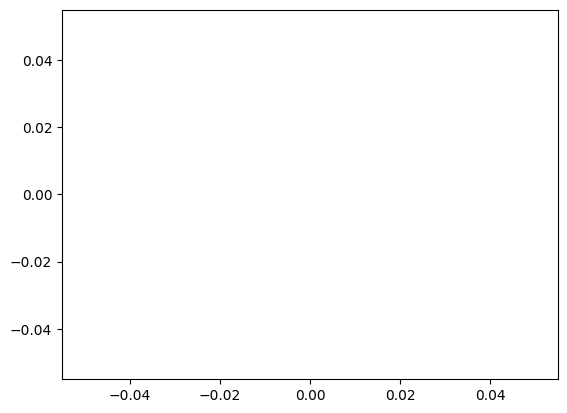

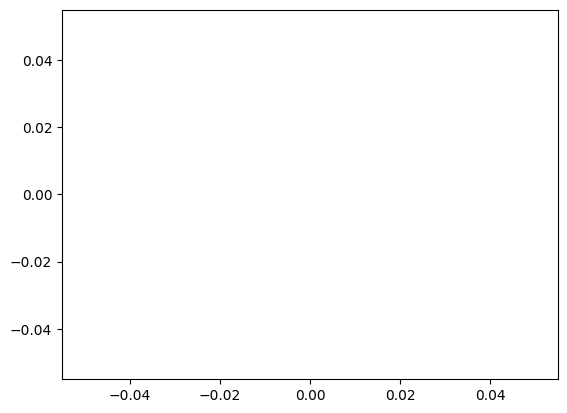

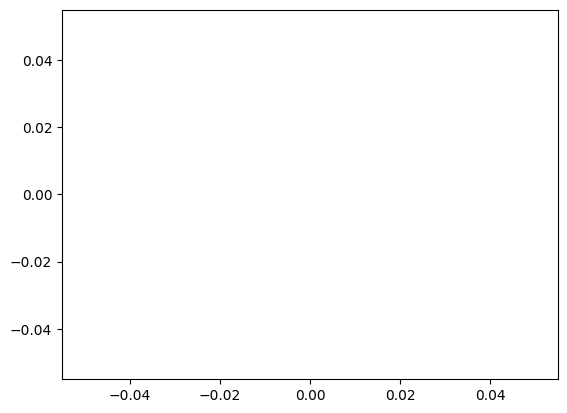

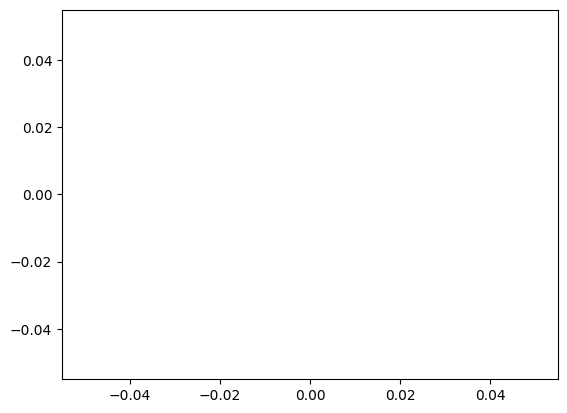

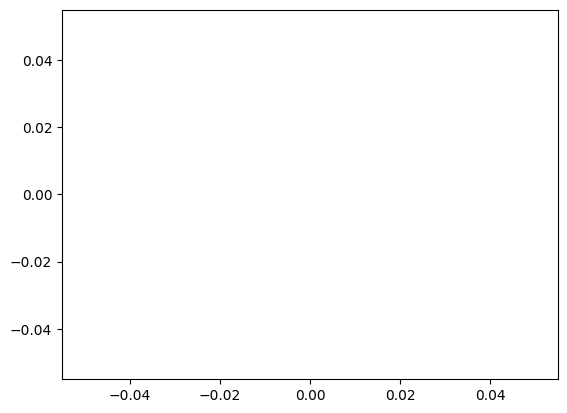

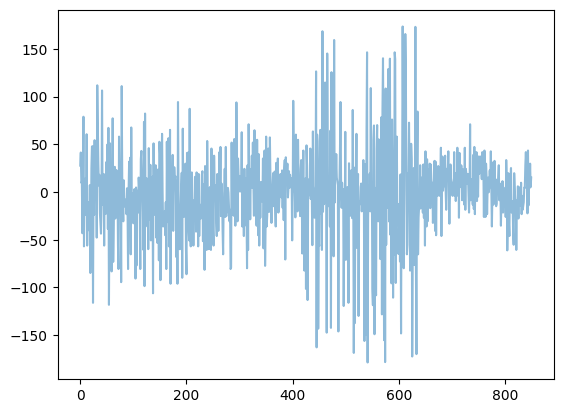

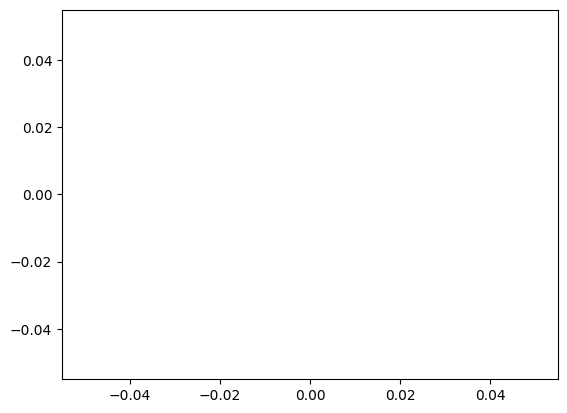

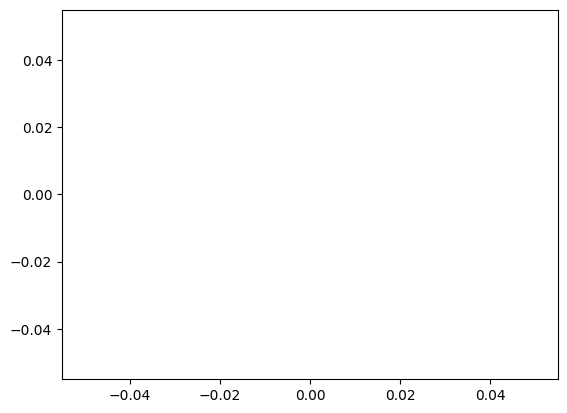

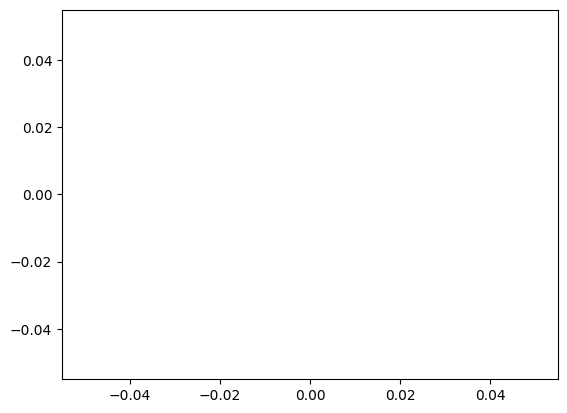

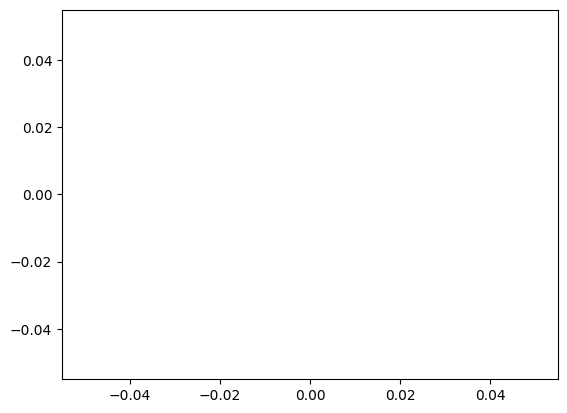

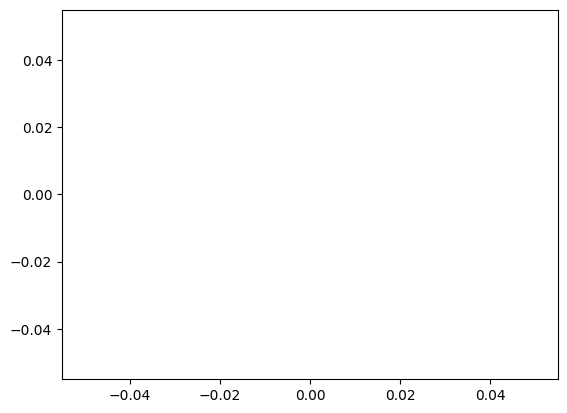

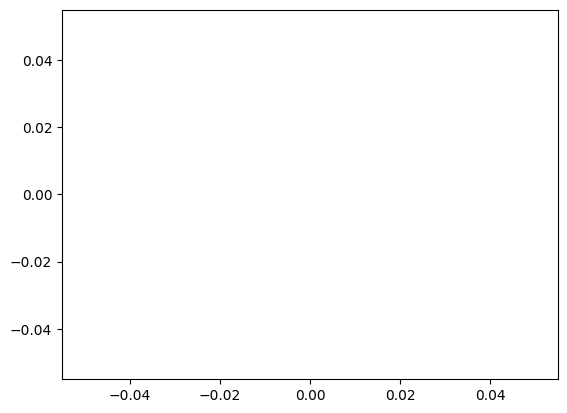

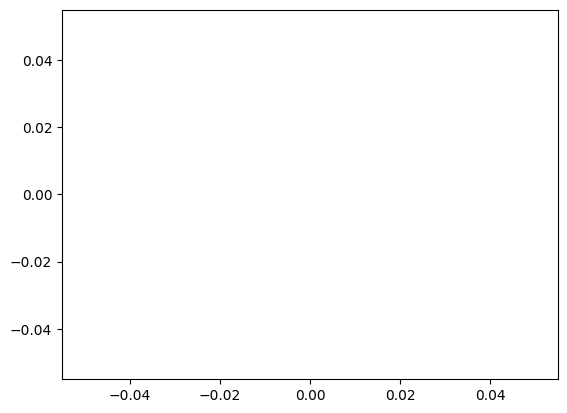

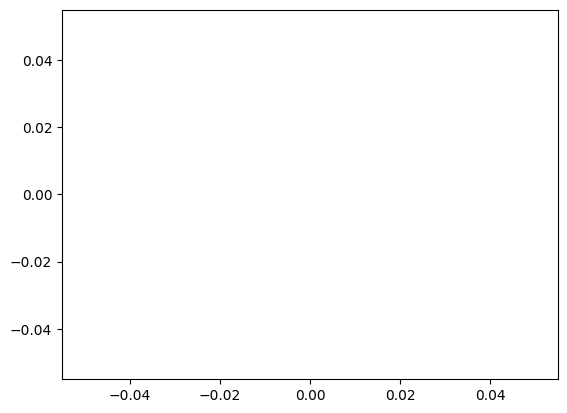

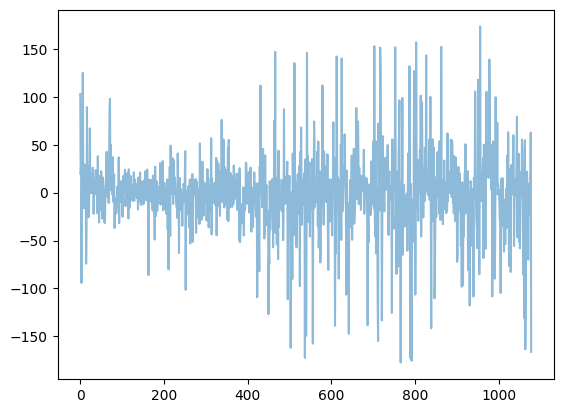

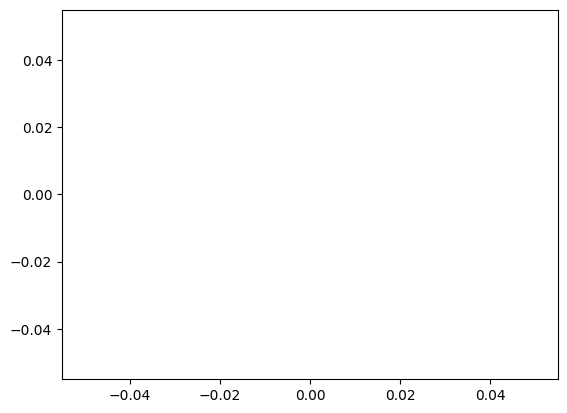

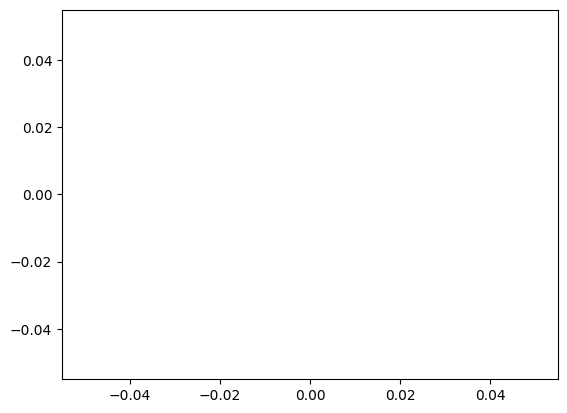

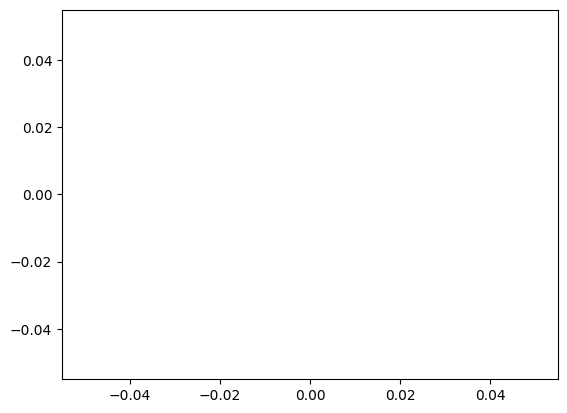

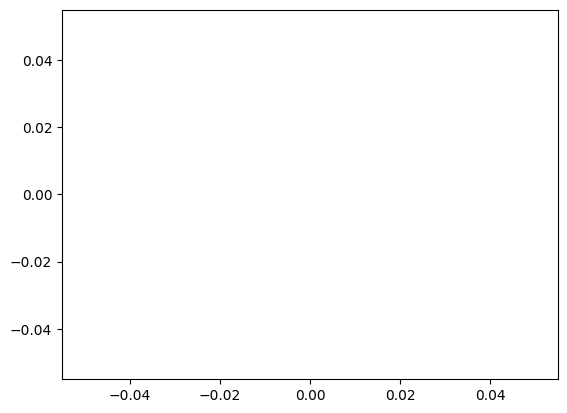

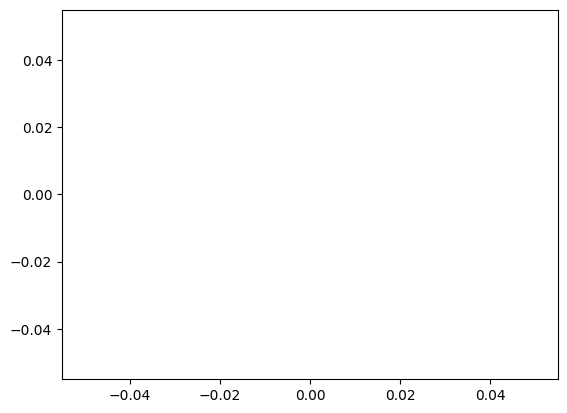

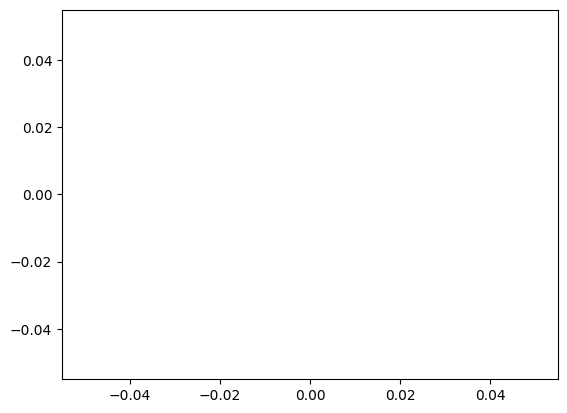

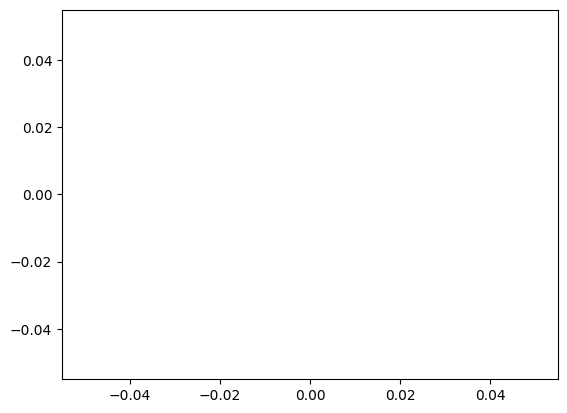

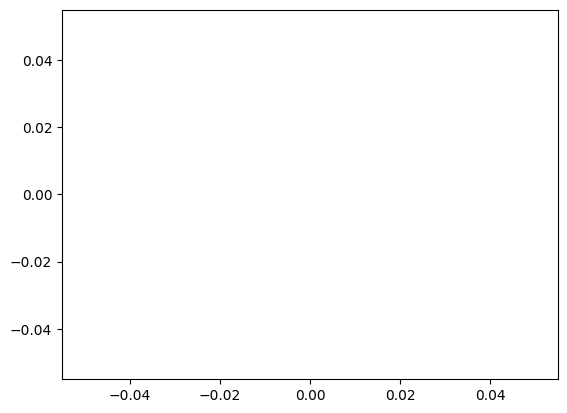

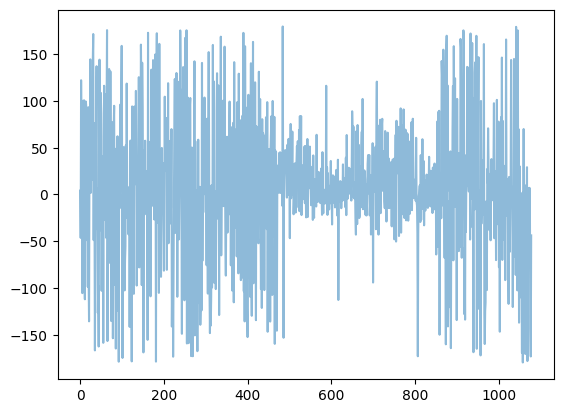

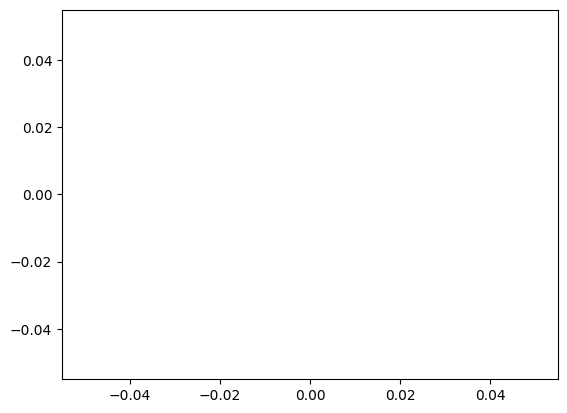

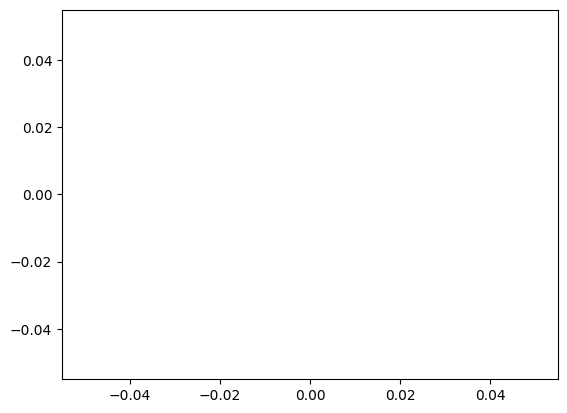

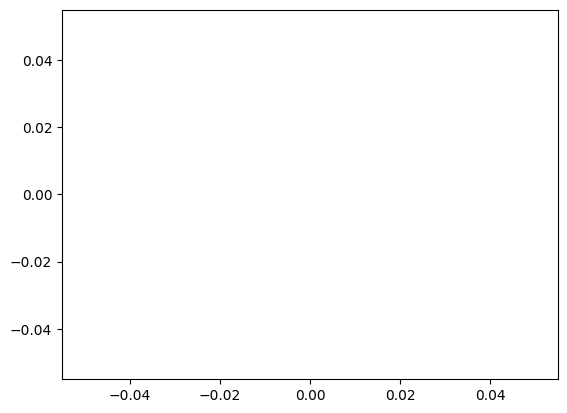

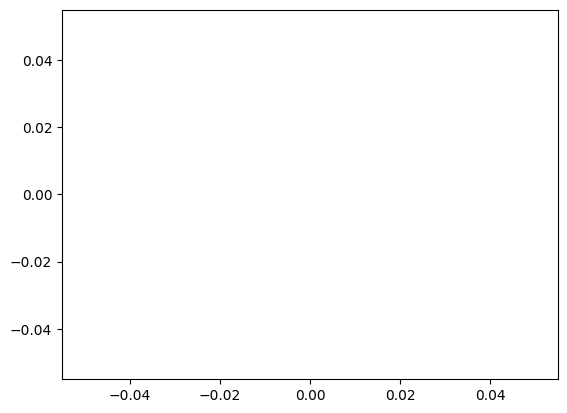

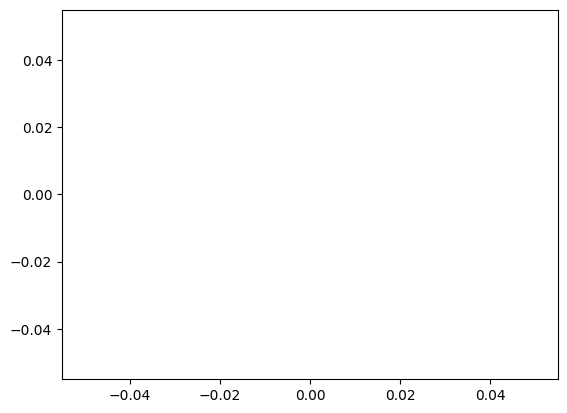

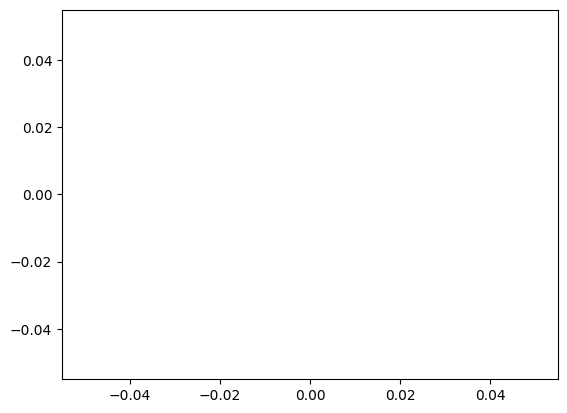

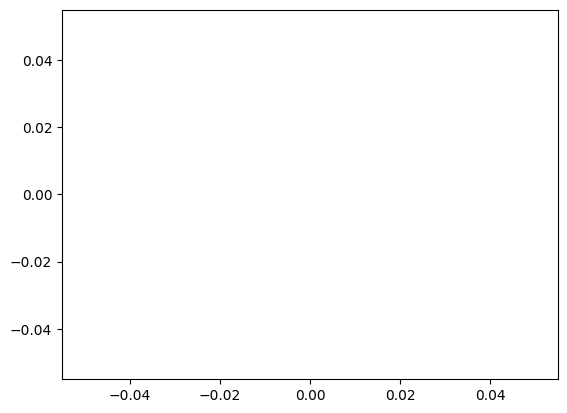

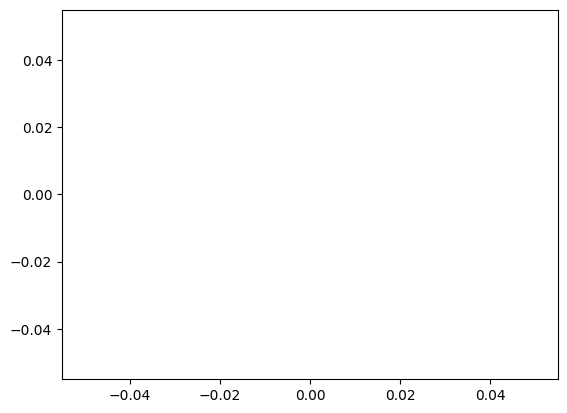

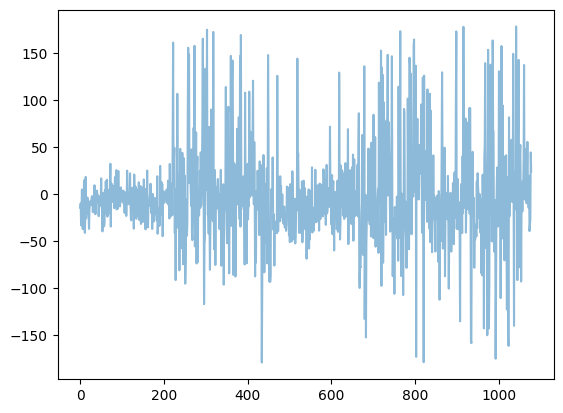

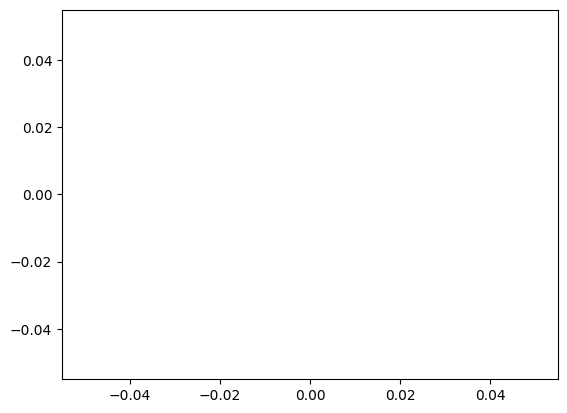

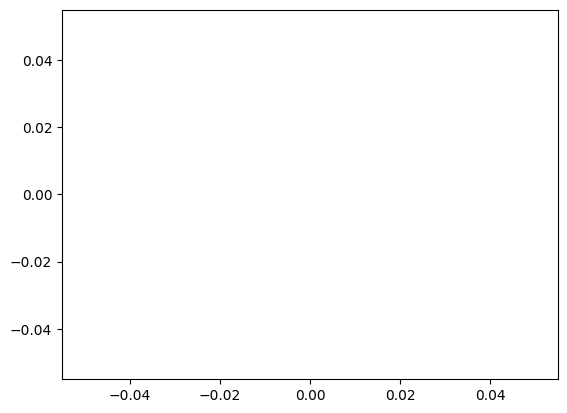

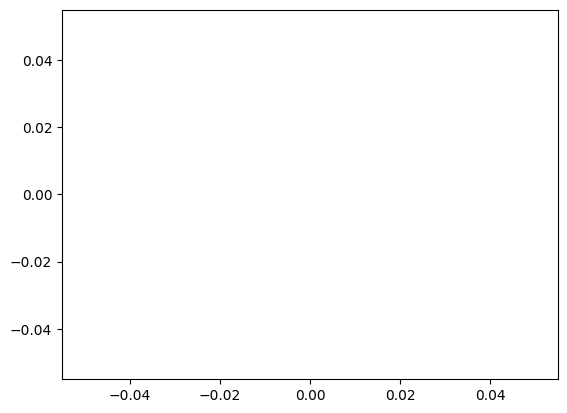

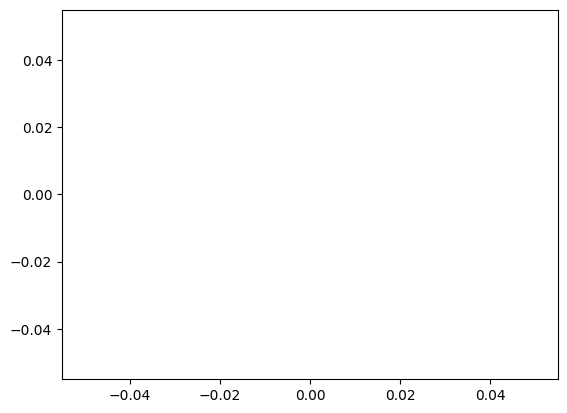

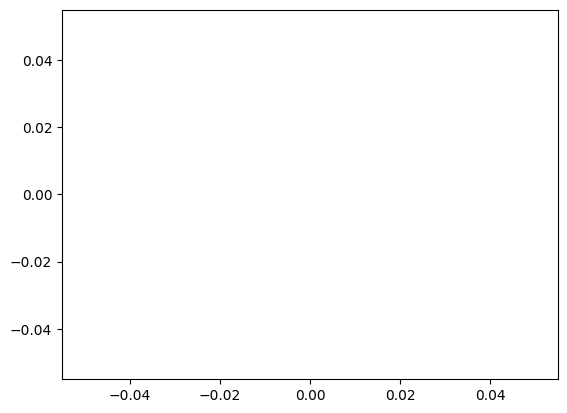

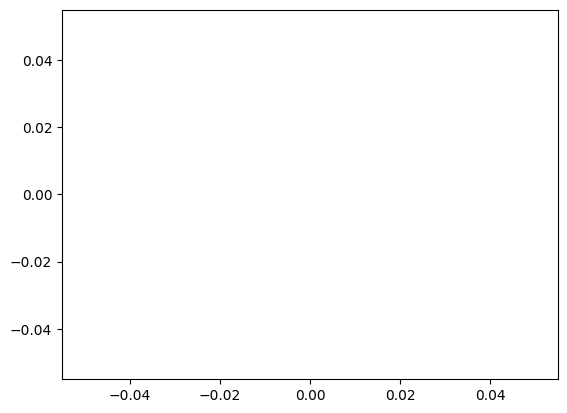

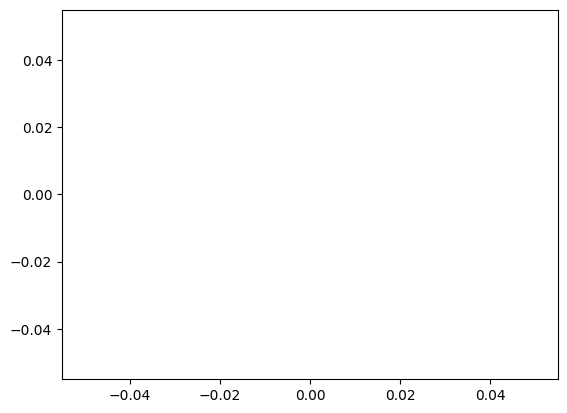

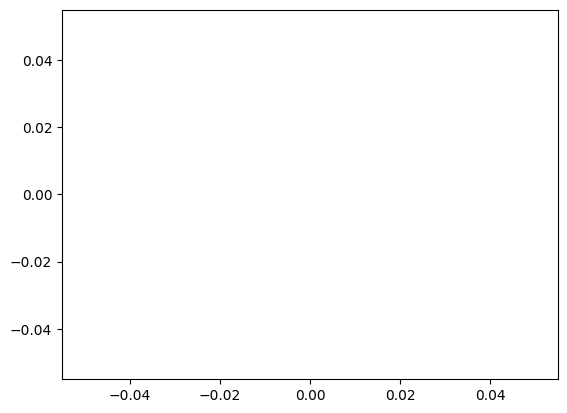

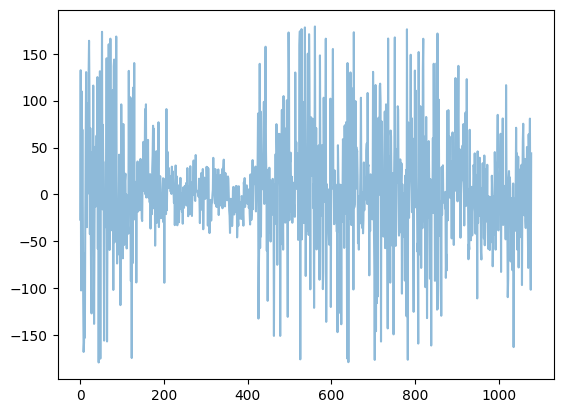

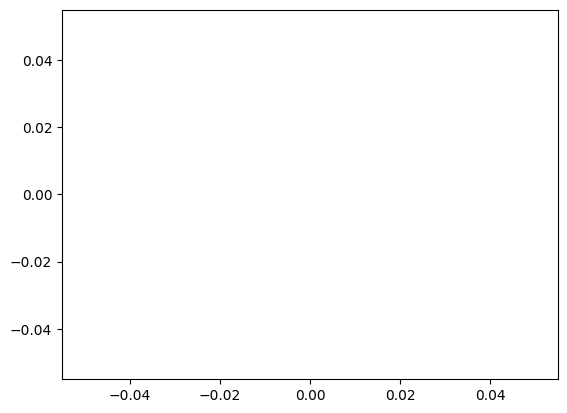

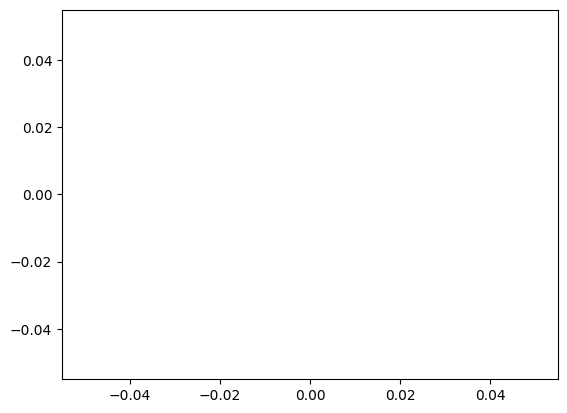

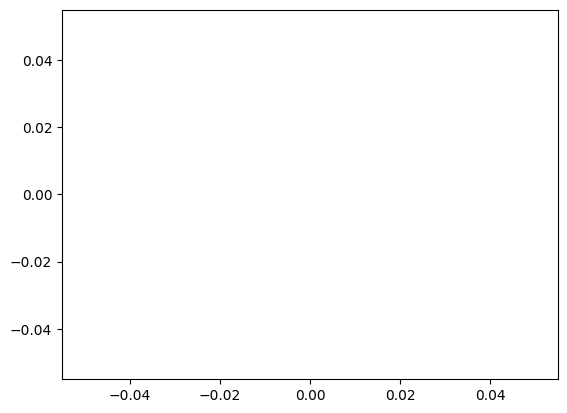

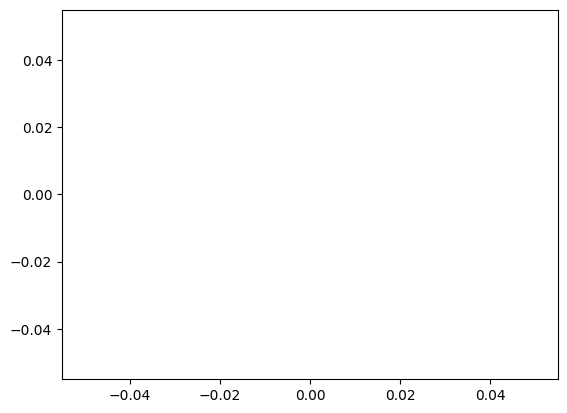

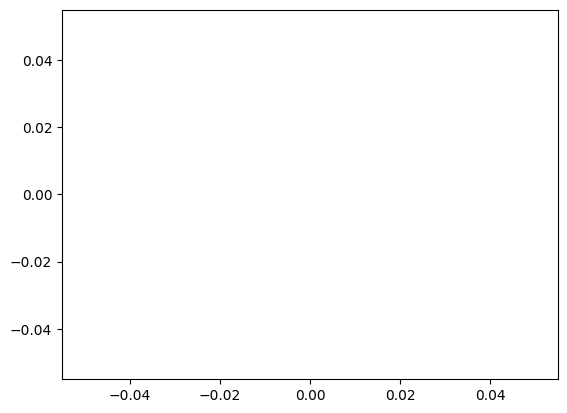

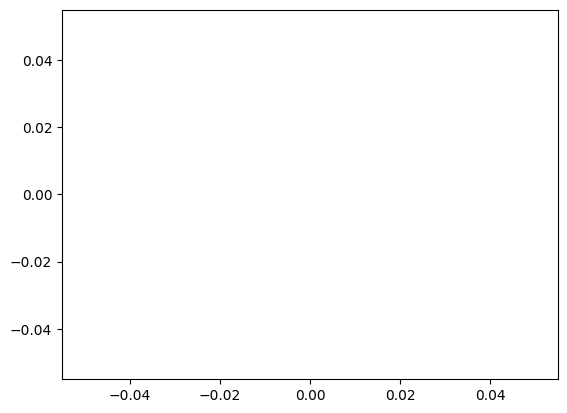

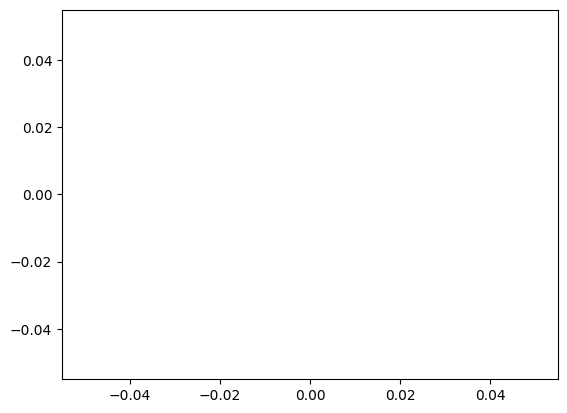

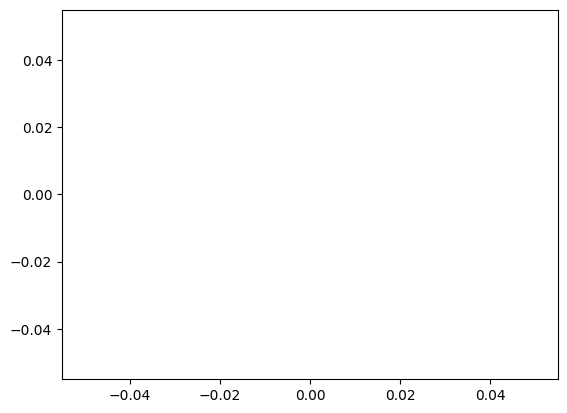

In [ ]:

df["subject_estimate_rad"] = np.arctan2(df["estimate_y"], df["estimate_x"])
df["error_deg"]  = df["motion_direction"]-np.degrees(df["subject_estimate_rad"])
df["error_deg"] = (df["error_deg"] + 180) % 360 - 180


plt.axis

for i in range (1,np.max(df["subject_id"])+1):
    df3 = df.query("subject_id == @i")
    df3 = df3.assign(row_number=range(len(df3)))
    for j in range (1,np.max(df["session_id"])+1):
        df3 = df3.query("session_id == @j")
#       plt.scatter(df2["trial_index"], df2["error_cur"],alpha=0.5)
        plt.plot(df3["row_number"], df3["error_deg"],alpha=0.5)
        plt.show()
